<a id="9"></a>


<font color="BLUE YELLOW" size=+3><b> EXCERCISE MODULE 4 </b></font>

<a id="4"></a>

---
<font color="GREEN" size=+1><b> FENNY ANGGRAINI -  DS04038 </b></font>

---

#**Module 2: Data Preprocessing**

##**Importing Libraries**

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install pandas-profiling
from pandas_profiling import ProfileReport
from plotly.offline import iplot
!pip install joypy
import joypy
import os
import glob
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

##**Importing Dataset**

Download Dataset pada: https://bit.ly/DatasetExerciseDSSC4

Run code di bawah untuk upload file, lalu choose file penguins_lter.csv dan penguins_size.csv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving penguins_lter.csv to penguins_lter.csv
Saving penguins_size.csv to penguins_size.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['penguins_size.csv']))
study_data = pd.read_csv(io.BytesIO(uploaded['penguins_lter.csv']))

Memanggil tabel data

In [ ]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


##**Describing Dataset**

Tampilkan statistik deskriptif dari data!

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
data.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [ ]:
data.describe(include='object')

,species,island,sex
count,344,344,334
unique,3,3,3
top,Adelie,Biscoe,MALE
freq,152,168,168


***
**Insight**
***
Berapa rata - rata body mass penguin?

In [ ]:
print('Rata - rata body mass penguin = ', data.body_mass_g.mean().round(2))

Rata - rata body mass penguin =  4201.75


##**Handling Missing Values**

Cek jumlah missing value!

In [ ]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Pada dataset penguins_size.csv, terdapat 5 kolom yang memiliki missing value. Missing tersebut nantinya akan diatasi dengan cara - cara yang berbeda, ada yang di hapus dan ada yang di isi. Missing value pada tiap kolom diantaranya yaitu :

1. Culmen Length (mm) terdapat 2 missing
2. Culmen Depth (mm) terdapat 2 missing
3. Flipper Length (mm) terdapat 2 missing
4. Body Mass (g) terdapat 2 missing
5. Sex terdapat 10 missing

Drop missing value pada culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g!

In [ ]:
data = data.dropna(subset = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'])

Mengisi missing value pada sex dengan modus!

In [ ]:
data.sex.fillna(data.sex.mode()[0], inplace=True)

<ipython-input-14-a8c6a9873d7f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Pada baris ke 336 kolom sex, terdapat data berisi titik (.), drop baris data tersebut!

In [ ]:
data.sex.iloc[335:340]

336         .
337      MALE
338    FEMALE
340    FEMALE
341      MALE
Name: sex, dtype: object

In [ ]:
data.drop(data[data['sex']=='.'].index, inplace=True)

<ipython-input-16-90aace06ecbb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Cek kembali apakah masih ada missing value!

In [ ]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Dapat dilihat yang semula pada kolom culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, sex terdapat nilai null ketika sudah di lakukan drop missing value tidak adanya lagi nilai null tersebut pada kolom.

In [ ]:
data.head(336)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
332,Gentoo,Biscoe,43.5,15.2,213.0,4650.0,FEMALE
333,Gentoo,Biscoe,51.5,16.3,230.0,5500.0,MALE
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,FEMALE
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,MALE


Dapat terlihat setelah melakukan proses drop baris ke-336 setelah di cek kembali pada dataset baris tersebut sudah terhapus dengan hilangnya baris ke-336 seperti dataset di atas yang mana langsung loncat ke baris berikutnya setelah baris 335 yaitu baris 337.

***
**Insight**
***
Apakah masih terdapat missing value?

**Jawaban :**


Terbukti pada output di atas bahwa tidak ada lagi baris dan kolom yang memiliki missing value, karena sudah dilakukan pengolahan terhadap missing value di dataset.

##**Exploratory Data Analysis**

Tampilkan grafik yang menunjukkan jumlah tiap spesies pinguin!

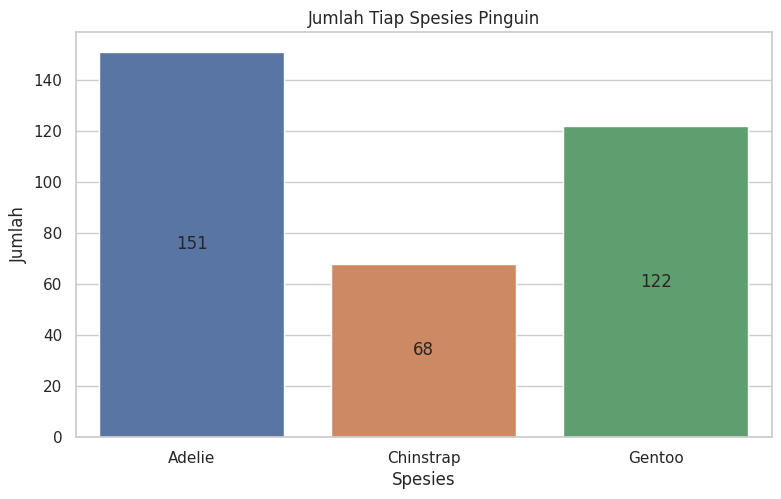

In [ ]:
sns.set(style='whitegrid')

# Membuat plot
barplot = sns.countplot(x='species', data=data)

# Menambahkan judul dan label sumbu
barplot.set(title='Jumlah Tiap Spesies Pinguin', xlabel='Spesies', ylabel='Jumlah')

# Menambahkan label
for bar in barplot.containers:
    barplot.bar_label(bar, label_type='center')

***
**Insight**
***
Spesies apa dengan jumlah pinguin paling banyak?

**Jawaban :**

Spesies dengan jumlah penguin terbanyak adalah Adelie dengan 151 penguin

Tampilkan scatterplot yang menunjukkan korelasi antara culmen_length dan flipper_length!

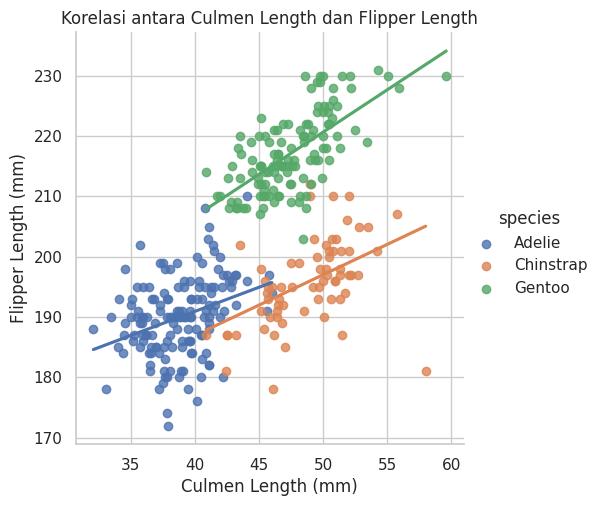

In [ ]:
sns.set(style='whitegrid')

# Membuat scatterplot
corr1 = sns.lmplot(x='culmen_length_mm', y='flipper_length_mm',hue='species',ci=None, data=data)

# Menambahkan judul dan label sumbu
corr1.set(title='Korelasi antara Culmen Length dan Flipper Length', xlabel='Culmen Length (mm)', ylabel='Flipper Length (mm)')

***
**Insight**
***
Bagaimana korelasi antara culmen_length dan flipper_length?

**Jawaban :**

Berdasarkan scatter plot yang telah dibuat, terlihat bahwa terdapat **korelasi positif** antara culmen length dan flipper length berdasarkan spesiesnya. Hal ini ditunjukkan dengan garis linear yang menandakan semakin panjang culmen dari penguin, maka semakin panjang pula flipper dari penguin.

Tampilkan scatterplot yang menunjukkan korelasi antara flipper_length dan body_mass!

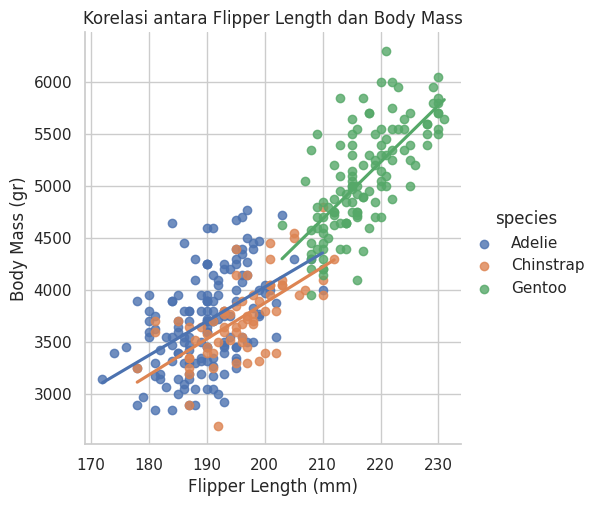

In [ ]:
sns.set(style='whitegrid')

# Membuat scatterplot
corr2 = sns.lmplot(x='flipper_length_mm', y='body_mass_g', hue='species', ci=None, data=data)

# Menambahkan judul dan label sumbu
corr2.set(title='Korelasi antara Flipper Length dan Body Mass', xlabel='Flipper Length (mm)', ylabel='Body Mass (gr)')

***
**Insight**
***
Bagaimana korelasi antara flipper_length dan body_mass?

**Jawaban :**

Berdasarkan scatter plot yang telah dibuat, terlihat bahwa terdapat **korelasi positif** antara flipper length dan body mass berdasarkan spesiesnya. Hal ini ditunjukkan dengan garis linear yang menandakan semakin panjang flipper dari penguin, maka semakin berat pula massa tubuh dari penguin.

Tampilkan pairplot dari semua variabel!

Text(0.5, 1.1, 'Pairplot dari Seluruh Variabel')

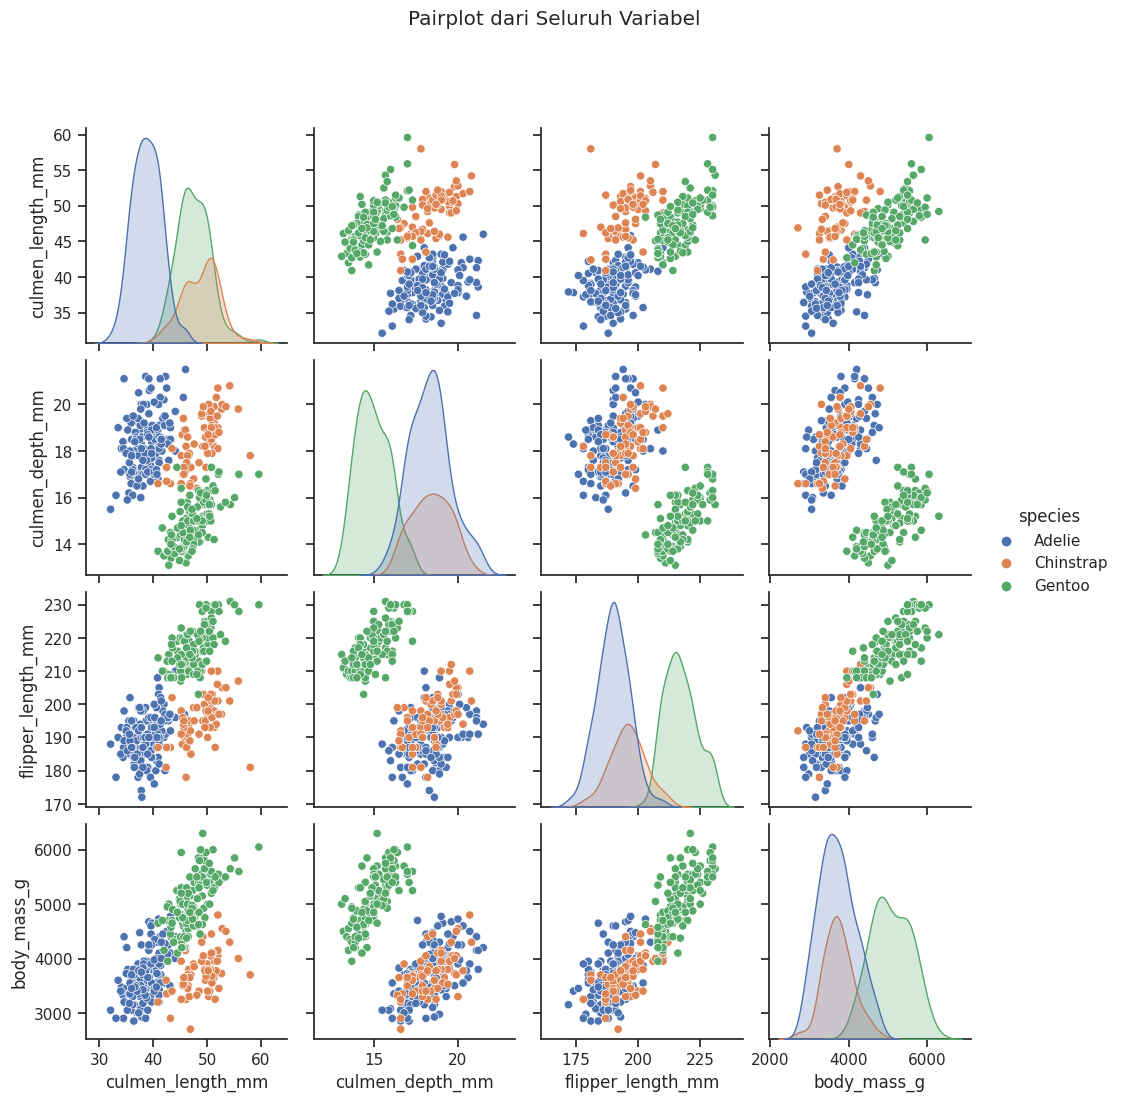

In [ ]:
sns.set(style='ticks')

# Membuat pairplot dari seluruh variabel
pairplot = sns.pairplot(data, hue='species')

# Menambahkan judul pada plot
pairplot.fig.suptitle('Pairplot dari Seluruh Variabel', y=1.1)

***
**Insight**
***
Apa kesimpulan yang dapat kamu ambil dari pairplot di atas?

**Jawaban :**

Berdasarkan pairplot diatas dapat ditarik kesimpulan:

**Scatter Plot**

1. Antara culmen_depth_mm dengan culmen_length_mm terdapat korelasi positif pada semua spesies.
2. Antara flipper_length_mm dengan culmen_length_mm terdapat korelasi positif pada semua spesies.
3. Antara body_mass_g dengan culmen_length_mm terdapat korelasi positif pada semua spesies.
4. Antara flipper_length_mm dengan culmen_depth_mm terdapat korelasi positif pada semua spesies.
5. Antara flipper_length_mm dengan body_mass_g terdapat korelasi positif pada semua spesies.
6. Antara body_mass_g dengan flipper_length_mm terdapat korelasi positif pada semua spesies.

**Density Plot**

1. Distribusi pada variabel culmen_length_mm berdasarkan speciesnya adalah distribusi normal (no skew) karena data cenderung berkumpul di tengah.
2. Distribusi pada variabel culmen_depth_mm berdasarkan speciesnya adalah distribusi normal (no skew) karena data cenderung berkumpul di tengah.
3. Distribusi pada variabel flipper_length_mm berdasarkan speciesnya adalah distribusi normal (no skew) karena data cenderung berkumpul di tengah.
4. Distribusi pada variabel body_mass_g berdasarkan speciesnya adalah distribusi normal (no skew) karena data cenderung berkumpul di tengah.

#**Module 3: Machine Learning**

##**Data Encoding**

In [ ]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


Data encoding adalah sebuah proses untuk mengubah data kategorikal menjadi numerikal. Dimana pada kolom species, island, dan sex masih berupa kolom kategorikal. Oleh sebab itu, dilakukan pengubahan agar kolom-kolom menjadi numerikal.

Lakukan data encoding pada kolom 'species' dan 'island'!

In [ ]:
#Ambil kolom species lalu ditranformasi menggunakan dummie
species = pd.get_dummies(data["species"])
species.head()

,Adelie,Chinstrap,Gentoo
0,1,0,0
1,1,0,0
2,1,0,0
4,1,0,0
5,1,0,0


In [ ]:
#Ambil kolom island lalu ditranformasi menggunakan dummie
island = pd.get_dummies(data["island"])
island.head()

,Biscoe,Dream,Torgersen
0,0,0,1
1,0,0,1
2,0,0,1
4,0,0,1
5,0,0,1


Data encoding untuk kolom 'sex', kodekan male sebagai 0 dan female sebagai 1!

In [ ]:
# mentranformasi menggunakan one-hot encoding sklearn
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(sparse=False)
data['sex'] = one_hot.fit_transform(data[['sex']])
data

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

<ipython-input-26-04199bf29aad>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0.0
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,1.0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,0.0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1.0


In [ ]:
#Mengambil data numeric
numeric = pd.DataFrame(data, columns=["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g", "sex"])
numeric.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,0.0
1,39.5,17.4,186.0,3800.0,1.0
2,40.3,18.0,195.0,3250.0,1.0
4,36.7,19.3,193.0,3450.0,1.0
5,39.3,20.6,190.0,3650.0,0.0


***
**Insight**

- Pada kolom Species dan island dilakukan endcoding dengan menggunakan dummie
- Pada kolom Sex dilakukan encoding dengan menggunakan one-hot encoding dari library sklearn
- Pada dataset yang baru jumlah kolom berubah menjadi 11 kolom

***
Bagaimana dataset setelah dilakukan encoding?

**Jawaban :**

Berikut ini dapat terlihat bahwa setiap kolom kategorikal setelah dilakukan encoding berubah menjadi numerikal, yang mana terjadi perubahan pada kolom spesies, island, dan sex. Dataset yang semula terdapat data ordinal, sekarang menjadi numerik semua dan jumlah kolom bertambah menjadi 11 kolom


In [ ]:
# Menggabungkan beberapa kolom yang telah diproses
df = pd.concat([species, island, numeric], axis=1)
df

,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,0,0,0,0,1,39.1,18.7,181.0,3750.0,0.0
1,1,0,0,0,0,1,39.5,17.4,186.0,3800.0,1.0
2,1,0,0,0,0,1,40.3,18.0,195.0,3250.0,1.0
4,1,0,0,0,0,1,36.7,19.3,193.0,3450.0,1.0
5,1,0,0,0,0,1,39.3,20.6,190.0,3650.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
338,0,0,1,1,0,0,47.2,13.7,214.0,4925.0,1.0
340,0,0,1,1,0,0,46.8,14.3,215.0,4850.0,1.0
341,0,0,1,1,0,0,50.4,15.7,222.0,5750.0,0.0
342,0,0,1,1,0,0,45.2,14.8,212.0,5200.0,1.0


##**Memisahkan Variabel Dependen dan Independen**

Variabel dependen yang digunakan adalah data pada kolom 'sex', kolom lainnya merupakan variabel independen

Pisahkan variabel independen sebagai X dan independen sebagai y!

In [ ]:
X = df.drop('sex', axis=1)
y = df['sex']

##**Scaling the Data**

Lakukan scaling pada x!

In [ ]:
# Import library StandartScaler yang akan digunakan
from sklearn.preprocessing import StandardScaler

# Mendefinisikan standard scaler
scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 1.12172998, -0.49908341, -0.74637633, ...,  0.78276694,
        -1.41564362, -0.561437  ],
       [ 1.12172998, -0.49908341, -0.74637633, ...,  0.12394677,
        -1.05938201, -0.4990246 ],
       [ 1.12172998, -0.49908341, -0.74637633, ...,  0.42801762,
        -0.41811113, -1.18556092],
       ...,
       [-0.89148014, -0.49908341,  1.33980669, ..., -0.73758731,
         1.50570154,  1.93505872],
       [-0.89148014, -0.49908341,  1.33980669, ..., -1.19369358,
         0.79317833,  1.2485224 ],
       [-0.89148014, -0.49908341,  1.33980669, ..., -0.53487341,
         0.86443065,  1.49817197]])

In [ ]:
from sklearn import preprocessing

X = preprocessing.scale(X)

Scaling adalah suatu cara untuk membuat numerical data pada dataset memiliki rentang nilai (scale) yang sama. Tidak ada lagi satu variabel data yang mendominasi variabel data lainnya. Scaling ini juga termasuk kedalam proses preprocessing oleh sebab itu code-nya seperti contoh diatas.

##**Spltting Dataset**

Pisahkan dataset menjadi training dan testing dataset dengan perbandingan 80:20!

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(272, 10)
(69, 10)
(272,)
(69,)


Proses splitting data merupakan pembagian data menjadi data untuk training dan data untuk testing dimana disini saya membagi menjadi 80% data training dan 20% data testing, karena semakin banyak data yang dilatih mesin akan semakin banyak belajar sehingga bisa optimal dalam membangun model nantinya, dimana dengan random state sebanyak 100.

##**Model Fitting**

Build model klasifikasi machine learning menggunakan model Decision Tree!

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier # model fitting and prediction
from sklearn.metrics import classification_report, confusion_matrix # checking performance of model

model = DecisionTreeClassifier().fit(X_train, y_train)
pred = model.predict(X_test)

print('CONFUSION MATRIX')
print(confusion_matrix(y_test, pred))

CONFUSION MATRIX
[[33  5]
 [ 8 23]]


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression # model fitting and prediction
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score # checking performance of model

model = LogisticRegression().fit(X_train, y_train)
pred = model.predict(X_test)

print('CONFUSION MATRIX')
print(confusion_matrix(y_test, pred))

CONFUSION MATRIX
[[35  3]
 [ 4 27]]


#**Module 4: Model Performance Analytics**

##**Classification Report**

Tampilkan hasil evaluasi model yang telah dibangun menggunakan classification report!

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

**Decision Tree**

In [ ]:
print('CLASSIFICATION REPORT')
print(classification_report(y_test, pred))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.80      0.87      0.84        38
         1.0       0.82      0.74      0.78        31

    accuracy                           0.81        69
   macro avg       0.81      0.81      0.81        69
weighted avg       0.81      0.81      0.81        69



- Acurracy : Terlihat pada hasil report akurasi yang didapat sebesar 81% yang mana artinya model dapat memprediksi secara akurat sebesar 81% saja.
- Precission : Dimana terlihat presisi yang didapat 82% artinya memiliki hubungan yang cukup kuat antara data yang diminta dengan hasil prediksi yang diberikan oleh model.
- Recall : Recall yang didapat sebesar 74% artinya keberhasilan model dalam menemukan kembali sebuah informasi hanya sebesar itu tingkat akurasinya.
- F1- Score :menggambarkan perbandingan rata-rata precision dan recall yang dibobotkan. Dimana didapatkan hasil sebesar 78%.

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, pred)
print(f'Accuracy yang didapatkan dari Decession Tree: {accuracy:.2f}')

Accuracy yang didapatkan dari Decession Tree: 0.81


Jadi dapat terlihat pada report akurasi yang dihasilkan dari model Decission Tree cukup baik dimana menyentuh angka 81% walau akurasi ini tidak terlalu bagus dimana akurasi yang baik biasanya akan menghasilkan diatas 90%, namun ini sudah cukup lumayan dengan hasil akurasi sebasar itu.

**Logistic Regression**

In [ ]:
print('CLASSIFICATION REPORT')
print(classification_report(y_test, pred))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91        38
         1.0       0.90      0.87      0.89        31

    accuracy                           0.90        69
   macro avg       0.90      0.90      0.90        69
weighted avg       0.90      0.90      0.90        69



- Acurracy : Terlihat pada hasil report akurasi yang didapat sebesar 90% yang mana artinya model dapat memprediksi secara akurat sebesar 90%.
- Precission : Dimana terlihat presisi yang didapat 90% artinya memiliki hubungan yang cukup kuat antara data yang diminta dengan hasil prediksi yang diberikan oleh model.
- Recall : Recall yang didapat sebesar 87% artinya keberhasilan model dalam menemukan kembali sebuah informasi cukup baik dengan nilai sebesar itu tingkat akurasinya.
- F1- Score :menggambarkan perbandingan rata-rata precision dan recall yang dibobotkan. Dimana didapatkan hasil sebesar 89%.

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, pred)
print(f'Accuracy yang didapatkan dari Logistic Regression: {accuracy:.2f}')

Accuracy yang didapatkan dari Logistic Regression: 0.90


Berbeda halnya dengan Decession Tree yang hanya menghasilkan akurasi sebesar 81% justru malah model Logistic Regression dapat menghasilkan pemodelan yang baik dengan akurasi sebesar 90%.

***
**Insight**
***
Bagaimana interpretasi hasil classification report model kalian?

**Jawaban**

Berdasarkan hasil classification report dari model Decession Tree dan Logistic Regression di dapatkan lah hasil akurasi dimana model Logistic Regression ternyata lebih baik dalam memprediksi data dibanding dengan model Decission Tree pada kasus ini yang mana memiliki tingkat nilai tertinggi yaitu 90% pada model Logistic Regression dan untuk model Decission tree tingkat akurasi yang didapatkan lebih rendah hanya sebesar 81%.

Sehingga dapat disimpulkan dalam memprediksi pada kasus ini model yang terbaik dari kedua model tersebut adalah menggunakan algoritma Logistic Regression. Hal ini dikarenakan tingkat akurasi yang lebih tinggi di banding model yang satunya.Akan tetapi hal ini tidak menjadikan untuk menarik kesimpulan bahwasannya jika untuk melakukan pemodelan apapun maka digunakan Logistic Regression, jadi harus tetap melakukan banyak percobaan model untuk menentukan mana yang terbaik.

- Acurracy : menggambarkan seberapa akurat model dalam mengklasifikasikan dengan benar.
- Precission : menggambarkan akurasi antara data yang diminta dengan hasil prediksi yang diberikan oleh model
- Recall : Menggambarkan keberhasilan model dalam menemukan kembali sebuah informasi
- F1- Score :menggambarkan perbandingan rata-rata precision dan recall yang dibobotkan.

##**Confusion Matrix**

Tampilkan hasil evaluasi model yang telah dibangun menggunakan confusion matrix!

**Decision Tree**

Text(46.25, 0.5, 'Truth')

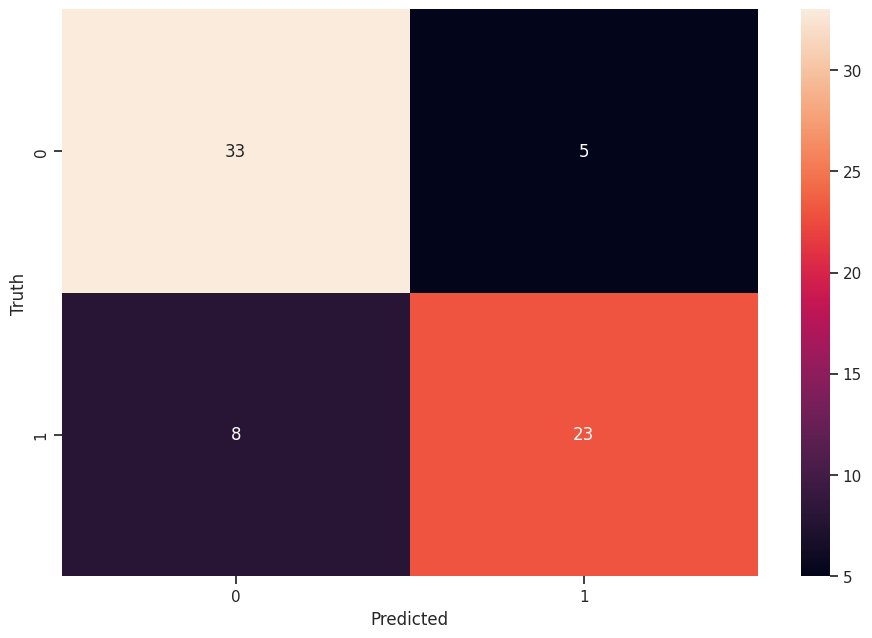

In [ ]:
#import library
import seaborn as sn

#mengimplementasikan testing data dan hasil prediksi dalam confusion matrix
cm = confusion_matrix(y_test, pred)

#membuat plotting confusion matrix
%matplotlib inline
plt.figure (figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Karena kita menggunakan kolom ‘sex’ sebagai dependent variable, maka kategorinya ada 2 yaitu 0 dan 1. Sumbu X (Truth) dari tabel diatas merupakan data sebenarnya dalam dataset yang terdiri dari 0 dan 1. Sumbu Y (Predicted) dari tabel diatas merupakan prediksi yang diberikan oleh model yang terdiri dari 0 dan 1.

Di koordinat (0,0) dan (1,0) terdapat nilai 33 dan 5 yang artinya ketika data sebenarnya adalah ‘0’, classification model berhasil memprediksinya sebagai ‘0’ sebanyak 33 kali dan memprediksinya sebagai ‘1’ sebanyak 5 kali. Kemudian di koordinat (1,0) dan (1,1) terdapat nilai 8 dan 23 yang artinya ketika data sebenarnya adalah ‘1’, classification model berhasil memprediksinya sebagai ‘1’ sebanyak 23 kali dan emprediksi sebagai ‘0’ sebanyak 8 kali.

**Logistic Regression**

Text(46.25, 0.5, 'Truth')

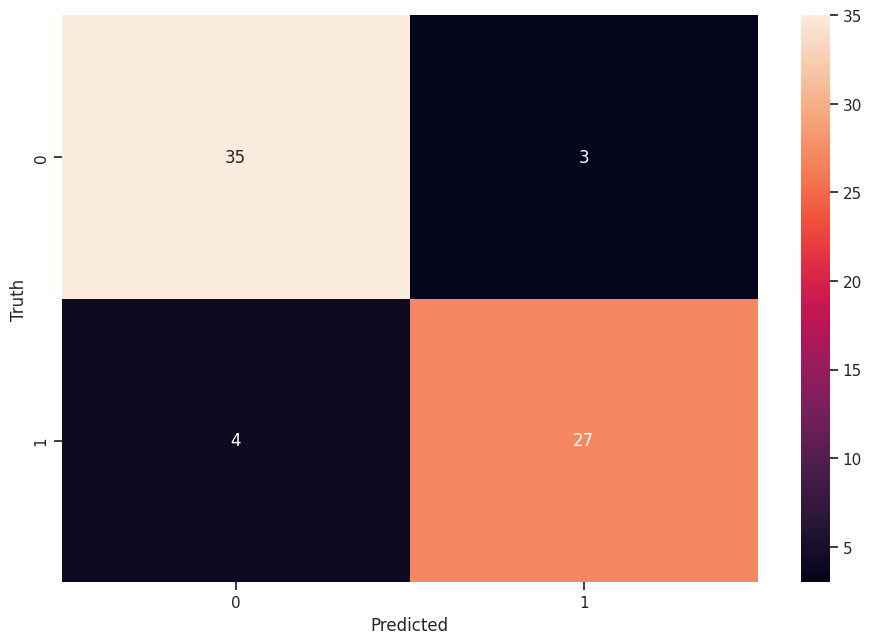

In [ ]:
#import library
import seaborn as sn

#mengimplementasikan testing data dan hasil prediksi dalam confusion matrix
cm = confusion_matrix(y_test, pred)

#membuat plotting confusion matrix
%matplotlib inline
plt.figure (figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Karena disini menggunakan kolom ‘sex’ sebagai dependent variable, maka kategorinya ada 2 yaitu 0 dan 1. Sumbu X (Truth) dari tabel diatas merupakan data sebenarnya dalam dataset yang terdiri dari 0 dan 1. Sumbu Y (Predicted) dari tabel diatas merupakan prediksi yang diberikan oleh model yang terdiri dari 0 dan 1.

Di koordinat (0,0) dan (1,0) terdapat nilai 35 dan 3 yang artinya ketika data sebenarnya adalah ‘0’, classification model berhasil memprediksinya sebagai ‘0’ sebanyak 35 kali dan memprediksinya sebagai ‘1’ sebanyak 3 kali. Kemudian di koordinat (1,0) dan (1,1) terdapat nilai 4 dan 27 yang artinya ketika data sebenarnya adalah ‘1’, classification model berhasil memprediksinya sebagai ‘1’ sebanyak 27 kali dan memprediksinya sebagai ‘0’ sebanyak 4 kali.

##**ROC Curve**

Tampilkan hasil evaluasi model yang telah dibangun menggunakan ROC curve!

**Decision Tree**

ROC CURVE


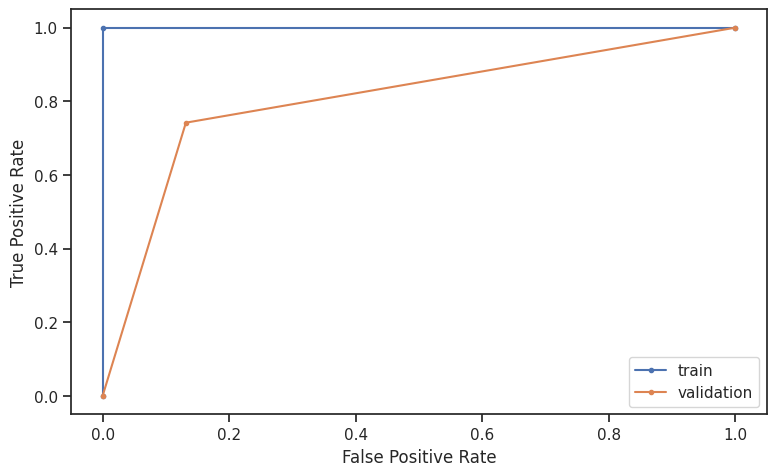

In [ ]:
# ROC CURVE

print('ROC CURVE')
train_probs = model.predict_proba(X_train)
train_probs1 = train_probs[:, 1]
fpr0, tpr0, thresholds0 = roc_curve(y_train, train_probs1)

test_probs = model.predict_proba(X_test)
test_probs1 = test_probs[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, test_probs1)

plt.plot(fpr0, tpr0, marker='.', label='train')
plt.plot(fpr1, tpr1, marker='.', label='validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

**Logistic Regression**

ROC CURVE


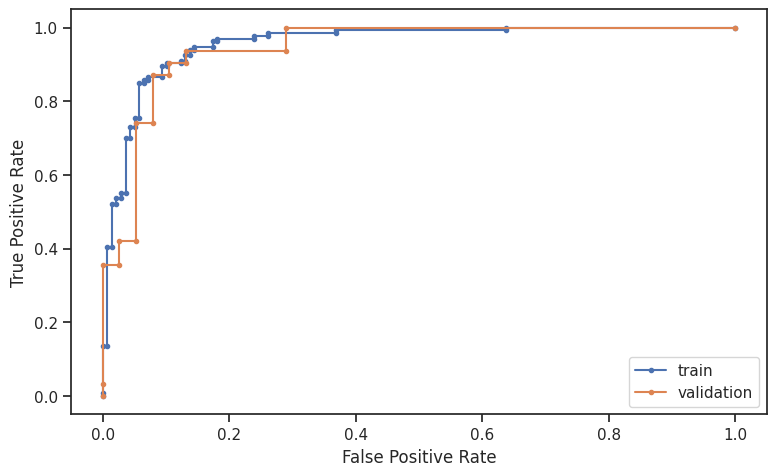

In [ ]:
# ROC CURVE

print('ROC CURVE')
train_probs = model.predict_proba(X_train)
train_probs1 = train_probs[:, 1]
fpr0, tpr0, thresholds0 = roc_curve(y_train, train_probs1)

test_probs = model.predict_proba(X_test)
test_probs1 = test_probs[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, test_probs1)

plt.plot(fpr0, tpr0, marker='.', label='train')
plt.plot(fpr1, tpr1, marker='.', label='validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

***
**Insight**
***
Bagaimana interpretasi hasil ROC curve model kalian?

**Jawaban**

Berdasarkan hasil kurva ROC yang didapatkan, terlihat hasil pada kurva ROC algortima Decession Tree tidak lebih baik dibandingkan dengan Kurva ROC pada algoritma Logistic Regression, dimana pada:

- Decession tree ROC Curve didapatkan hasil untuk kinerja pada saat train model lebih baik yaitu kurva berwarna biru dibanding dengan kurva oren dimana untuk validasi data, artinya model ini hanya bagus kinerjanya ketika melakukan proses training saja namun pada saat validasi atau testing data  kinerja model menjadi buruk atau menurun, sehingga hasil prediksi yang didaptkan tidak cukup baik. Kurva untuk training ini mendekati angkat 1 sangat baik dalam kinerja, namun tidak baik pada saat validasi karena dibawah 1.

- Logistic Regression terlihat hasil yang didapatkan bahwa kinerjaa kurva oren yang merupakan kurva validasi lebih baik dibanding dengan kurva biru untuk train, yang artinya model sudah bekerja dengan baik pada saat training dan lebih baik lagi ketika melakukan testing atau validasi data. Hasil kinerja antar training dan validasi data juga tidak terlalu jauh perbedaanya hanya sedikit lebih baik yang artinya pemodelan ini sama-sama melakukan kinerja yang baik, entah pada saat training maupun testing. Kurva ini antara training dan testing juga  menunjukan sama - sama hampir mendekati 1 yang artinya sudah cukup baik dalam pemodelan.